In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp 
import time
from tqdm.notebook import tqdm

# Cover time of a complete graph
#### Show that it grows as cnlog(n) 

#### We first need to define the functions needed

In [2]:
def create_complete_graph(n : int):
    vertex = set(range(n)) # set with all the vertices
    edges = {} # dictionary with the vertices as keys and the neighbourgs as values
    for i in vertex: # iterate over all the vertices
        edges[i] = list(range(n)) # add all the vertices as neighbourgs
        edges[i].pop(i) # remove the vertex itself since a state can't walk back to itself
    return edges # return the dictionary with the neighbours

def cover_time(edges : dict, n_simulations : int): 
    num_vertices = len(edges.keys()) # store how many vertices the graph has
    total_steps = 0 # start a total step counter at 0
        
    for _ in range(n_simulations): # iterate over the number of simulations
        steps = 0 # start a step counter at 0 for the simulation
        actual_vertex = random.choice(list(edges.keys())) # choose a random vertex to start the simulation
        visited = {actual_vertex} # store the visited start vertex in a set
        
        while len(visited) < num_vertices: # make the random walk work until all vertices are visited
            actual_vertex = random.choice(edges[actual_vertex]) # choose randomly a neighbourg of the actual vertex
            visited.add(actual_vertex) # add the vertex to the visited set
            steps += 1 # increase the step counter by 1
            
        total_steps += steps # add the steps of the simulation to the total steps
        
    average_cover_time = total_steps / n_simulations # calculate the expected cover time thanks to the law of large numbers
    
    return average_cover_time

In [3]:
graph_sizes = [n * 500 for n in range(1, 21)] # graph sizes to test
n_simulations = 2000 # number of simulations to run
cover_times_scores = [] # create a list to store the cover times for each graph size

for size in tqdm(graph_sizes): # iterate over the graph sizes
    edges = create_complete_graph(size) # create a complete graph with the size
    max_cover_time = cover_time(edges, n_simulations) # compute the cover time of the graph
    cover_times_scores.append(max_cover_time) # store the cover time in the list

  0%|          | 0/20 [00:00<?, ?it/s]

#### Having the cover time for all graphs, we need to determine the c value in order to demonstate that the time grows as cnlog(n)

In [4]:
c = sp.Symbol('c')
c_list = []
for index, n in enumerate(graph_sizes): # iterate over the graph sizes to find the c value
    c_list.append(sp.solve(c * n * sp.log(n) - cover_times_scores[index], c)[0]) # solve the equation for c and store the result in a list
avg_c = np.mean(c_list) # calculate the mean c value for all the graph sizes

#### Now we can plot the cover times and cnlog(n). If the number of simulations was enough we expect the two lines to overlap, thus demonstrating our hypotesis

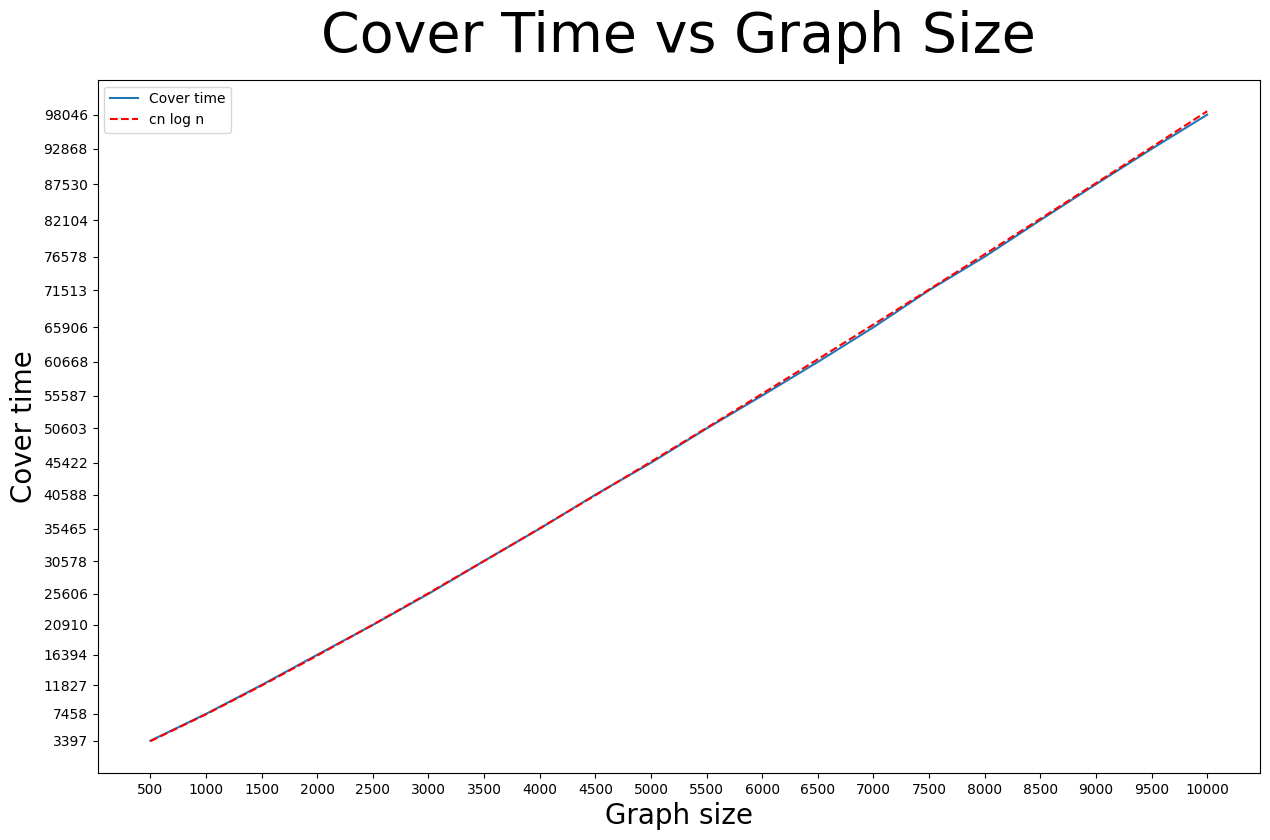

In [5]:
plt.figure(figsize = (15, 9))
plt.title('Cover Time vs Graph Size', fontsize = 40, pad = 20)

plt.plot(graph_sizes, cover_times_scores, label = 'Cover time')
plt.plot(graph_sizes, [avg_c * n * np.log(n) for n in graph_sizes], 'r--', label='cn log n')

plt.legend()
plt.xticks(graph_sizes)
plt.xlabel('Graph size', fontsize = 20)
plt.yticks(cover_times_scores)
plt.ylabel('Cover time', fontsize = 20)

plt.show()

# K-cover time of a complete graph
#### We need to demonstrate that parallel random walks on a complete graph are k times faster than a single random walk to cover all vertices of the graph. If we set k = n where n is the graph size, we expect the k-cover time to grow as clog(n)

#### First define the needed functions

In [6]:
def create_complete_graph(n):
    vertex = set(range(n))
    edges = {}
    for i in vertex:
        edges[i] = list(range(n))
        edges[i].pop(i)
    return edges

def random_walk_n_steps(n_steps, edges): # n_steps is the number of steps of the random walk
    actual_vertex = random.choice(list(edges.keys())) # choose a random vertex to start the walk
    visited = [actual_vertex] # store the initial vertex in a list instead of in a set, so we can keep track of the order of the vertices visited

    for step in range(n_steps): # iterate over the number of steps
        actual_vertex = random.choice(edges[actual_vertex]) # choose a random vertex from the neighbors of the actual vertex
        visited.append(actual_vertex) # store the vertex in the list of visited vertices
    
    return visited # return the list with the evolution in time of the random walk

def k_cover_time(graph_size, n_of_simulations):
    steps = graph_size * 10 # define a number of steps large enough so that the random walk visits all vertices before the loop ends
    edges = create_complete_graph(graph_size) # create the graph
    num_vertices = len(edges.keys()) # total vertices in the graph
    total_steps = 0 # we should store here the total steps taken by all simulations 

    for simulation in range(n_of_simulations): # start a simulation
        visited = set() # store here the visited vertices
        random_walks = {} # store the graph walks

    # Now i should create k parallel random walks and store how many steps it takes to visit all vertices with at least one random walk

        for k_walk in range(graph_size): # iterate over the k independent random walks. Since k = n, we can use the graph size
            random_walks[k_walk] = random_walk_n_steps(steps, edges) # create k random walks and store them in a dictionary. The key is the walk number and the value is the walk itself

        for step in range(steps): # iterate over the steps of the random walks. We should stop if all vertices are visited
            if len(visited) == num_vertices:
                break # if all the vertices have been visited, break the loop

            for k_walk in range(graph_size): # iterate over the k independent random walks
                visited.add(random_walks[k_walk][step]) # choose a random neighbour and add it to the set of visited vertices
                
            total_steps += 1 # increase the total steps counter by one

    return total_steps / n_of_simulations # calculate the expected k-cover time thanks to the law of large numbers

#### By iterating first over the steps, and then over the walks, we can check every step of the walks from first to last and append the visited edge to the set of visited edges. Thinking of our walks as a matrix, where the x axis are the steps and the y axis are the walks, in this way we check every column for new visited vertices. Every time a column is checked, the walks make one step (since they are parallel)

In [7]:
graph_sizes = [n * 10 for n in range(1, 21)] # graph sizes to test
n_of_simulations = 500 # number of simulations per graph size
cover_times_scores = [] # list to store all che k-cover times

for size in tqdm(graph_sizes): # iterate over the graph sizes
    score = k_cover_time(size, n_of_simulations) # calculate the k-cover time for each graph size
    cover_times_scores.append(score) # append the k-cover time to the list of scores

  0%|          | 0/20 [00:00<?, ?it/s]

#### Having the k-cover time for all graphs, we need to determine the c value in order to demonstate that the time grows as clog(n)

In [8]:
c = sp.Symbol('c')
c_list = []
for index, n in enumerate(graph_sizes): # iterate over the graph sizes to find the c value
    c_list.append(sp.solve(c * sp.log(n) - cover_times_scores[index], c)[0]) # solve the equation for c and store the result in a list
avg_c = np.mean(c_list) # calculate the mean c value for all the graph sizes

#### Now we can plot the cover times and clog(n). If the number of simulations was enough we expect the two lines to overlap, thus demonstrating our hypotesis

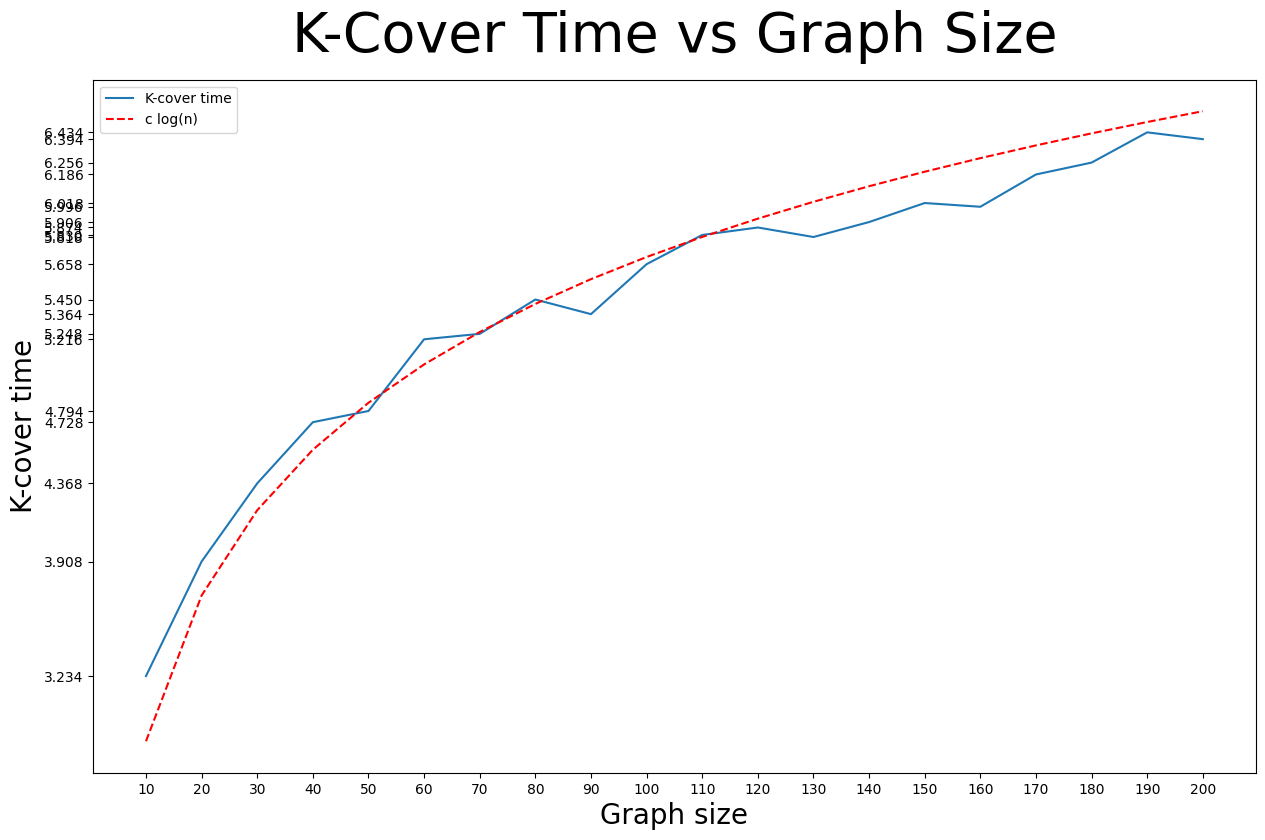

In [17]:
plt.figure(figsize = (15, 9))
plt.title('K-Cover Time vs Graph Size', fontsize = 40, pad = 20)

plt.plot(graph_sizes, cover_times_scores, label = 'K-cover time')
plt.plot(graph_sizes, [avg_c * np.log(n) for n in graph_sizes], 'r--', label = 'c log(n)')

plt.legend()
plt.xticks(graph_sizes)
plt.xlabel('Graph size', fontsize = 20)
plt.yticks(cover_times_scores)
plt.ylabel('K-cover time', fontsize = 20)

plt.show()

#### K-cover time of a complete graph grows as clog(n), and it grows k times faster as a single random walk cover time

#### Since for computational reasons the k-cover time has been calculated with smaller graphs and with fewer simulations, we now use the same parameters for the simple cover time so we can confront them

  0%|          | 0/20 [00:00<?, ?it/s]

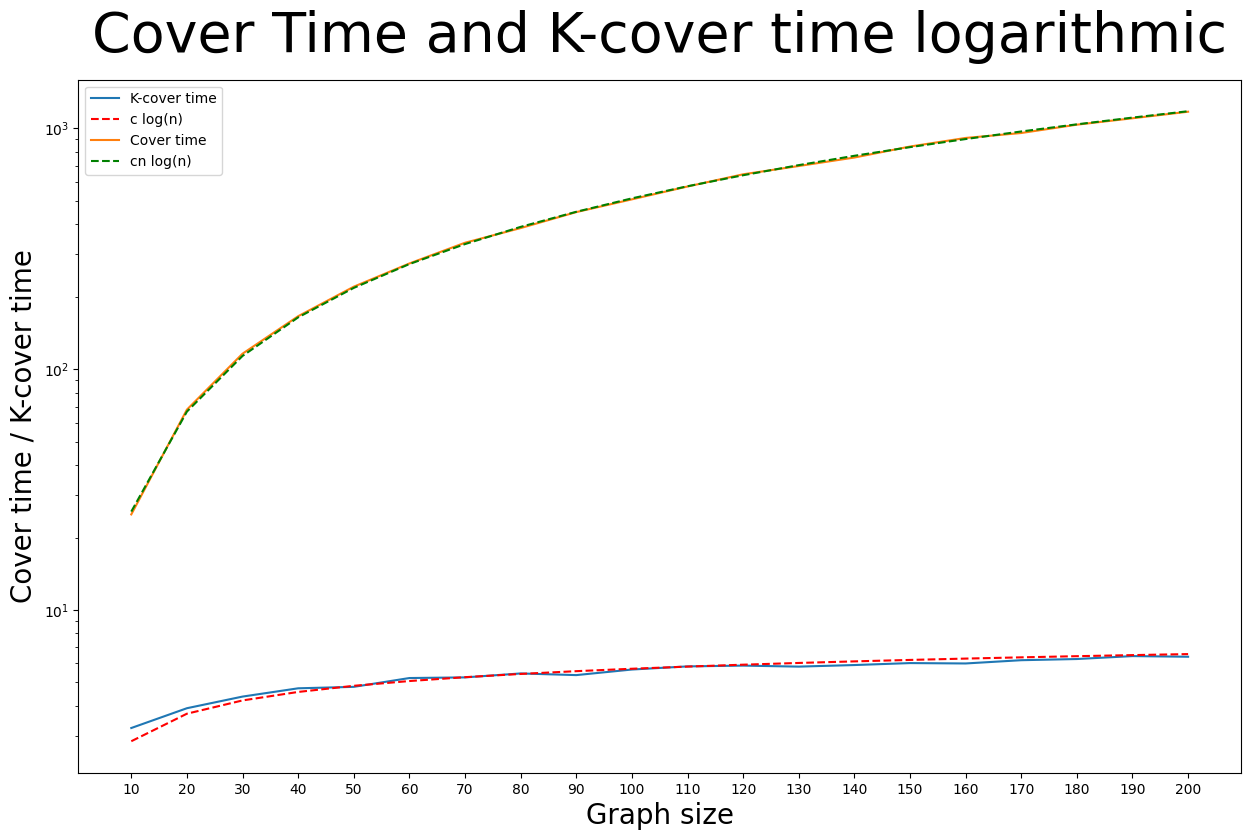

In [16]:
graph_sizes = [n * 10 for n in range(1, 21)] 
n_simulations = 1000
cover_times_scores_simple = [] 

for size in tqdm(graph_sizes): 
    edges = create_complete_graph(size) 
    max_cover_time = cover_time(edges, n_simulations) 
    cover_times_scores_simple.append(max_cover_time) 

c = sp.Symbol('c')
c_simple_list = []
for index, n in enumerate(graph_sizes): 
    c_simple_list.append(sp.solve(c * n * sp.log(n) - cover_times_scores_simple[index], c)[0]) 
avg_simple_c = np.mean(c_simple_list) 

plt.figure(figsize = (15, 9))
plt.title('Cover Time and K-cover time logarithmic', fontsize = 40, pad = 20)

plt.plot(graph_sizes, cover_times_scores, label = 'K-cover time')
plt.plot(graph_sizes, [avg_c * np.log(n) for n in graph_sizes], 'r--', label = 'c log(n)')
plt.plot(graph_sizes, cover_times_scores_simple, label = 'Cover time')
plt.plot(graph_sizes, [avg_simple_c * n * np.log(n) for n in graph_sizes], 'g--', label='cn log(n)')

plt.legend()
plt.xticks(graph_sizes)
plt.xlabel('Graph size', fontsize = 20)
plt.yticks(cover_times_scores + cover_times_scores_simple)
plt.ylabel('Cover time / K-cover time', fontsize = 20)
plt.yscale('log')

plt.show()

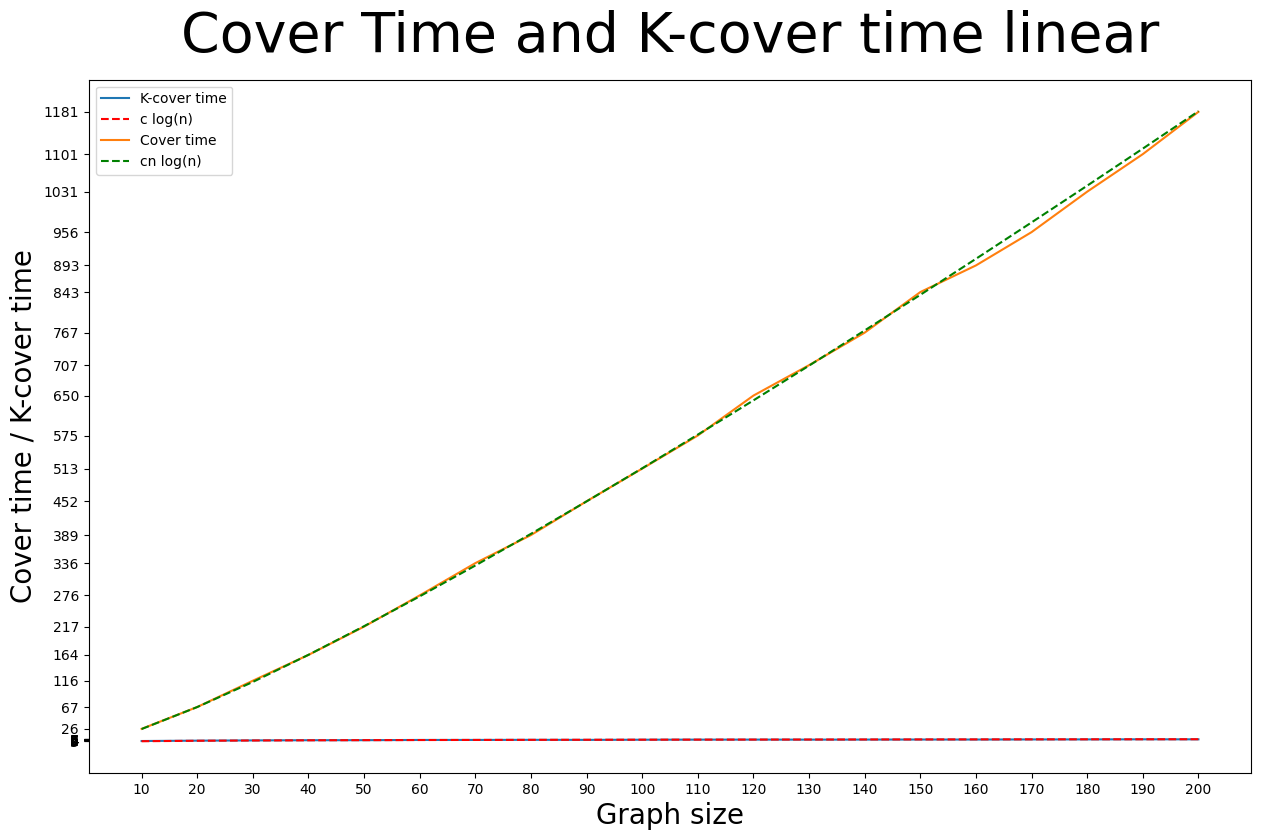

In [15]:
plt.figure(figsize = (15, 9))
plt.title('Cover Time and K-cover time linear', fontsize = 40, pad = 20)

plt.plot(graph_sizes, cover_times_scores, label = 'K-cover time')
plt.plot(graph_sizes, [avg_c * np.log(n) for n in graph_sizes], 'r--', label = 'c log(n)')
plt.plot(graph_sizes, cover_times_scores_simple, label = 'Cover time')
plt.plot(graph_sizes, [avg_simple_c * n * np.log(n) for n in graph_sizes], 'g--', label='cn log(n)')

plt.legend()
plt.xticks(graph_sizes)
plt.xlabel('Graph size', fontsize = 20)
plt.yticks(cover_times_scores + cover_times_scores_simple)
plt.ylabel('Cover time / K-cover time', fontsize = 20)

plt.show()